<a href="https://colab.research.google.com/github/sadVries/PRA3024/blob/main/GravitationalWavesW2_PRA3024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1
Challenge 1


dentify a loud binary black hole signal in white, Gaussian noise.

● Use the data file "challenge1.gwf". The channel name is "H1:CHALLENGE1".

● The data are white, Gaussian noise containing a simulated BBH signal.
1. Load the data into memory. What are the sampling rate and duration of the data?
2. Plot the data in the time-domain.
3. Plot a spectrogram (or q-transform) of the data, and try to identify the signal.
4. What is the time of the merger?

Installing everything and importing everything

In [ ]:
# -- Uncomment following line if running in Google Colab
! pip install -q 'gwosc==0.5.4'
! pip install pycbc

In [ ]:
! pip install -q 'gwpy==3.0.8'

In [ ]:
import gwosc
print(gwosc.__version__)
from gwosc.datasets import find_datasets
from gwosc import datasets
from gwosc.datasets import event_gps
import gwpy

from gwpy.timeseries import TimeSeries
from pycbc.psd import interpolate, inverse_spectrum_truncation
from pycbc import frame
import pylab
import numpy as np
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
from pycbc.filter import matched_filter
from scipy.stats import norm
import matplotlib.pyplot as plt

0.5.4


/usr/local/lib/python3.10/dist-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


### Challenge 1


Loading the data into memory


In [ ]:
c1_strain = TimeSeries.read("challenge1.gwf", channel="H1:CHALLENGE1")

Printing what the sampling rate is and the duration of the data


In [ ]:
print("The sampling rate is:      " + str(c1_strain.sample_rate))
print("The duration is:           " + str(c1_strain.duration))

The sampling rate is:      4096.0 Hz
The duration is:           128.0 s


Plotting the data in the time domain

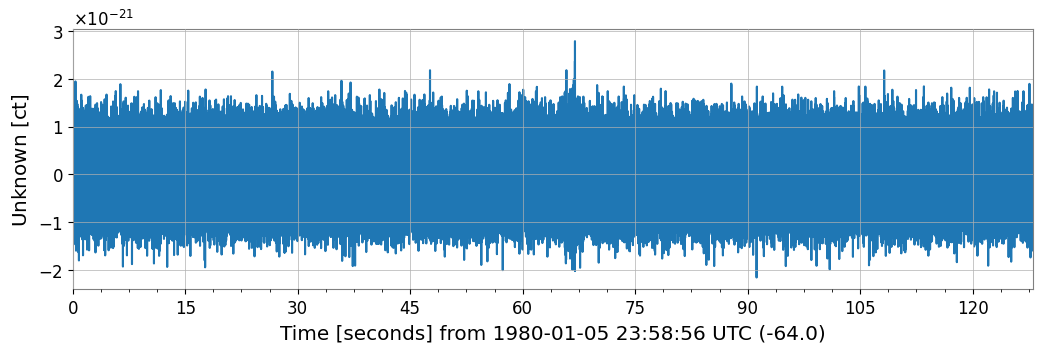

In [ ]:
%matplotlib inline

pls = plot = c1_strain.plot()

Makinf the q transform and zooming in using outseg

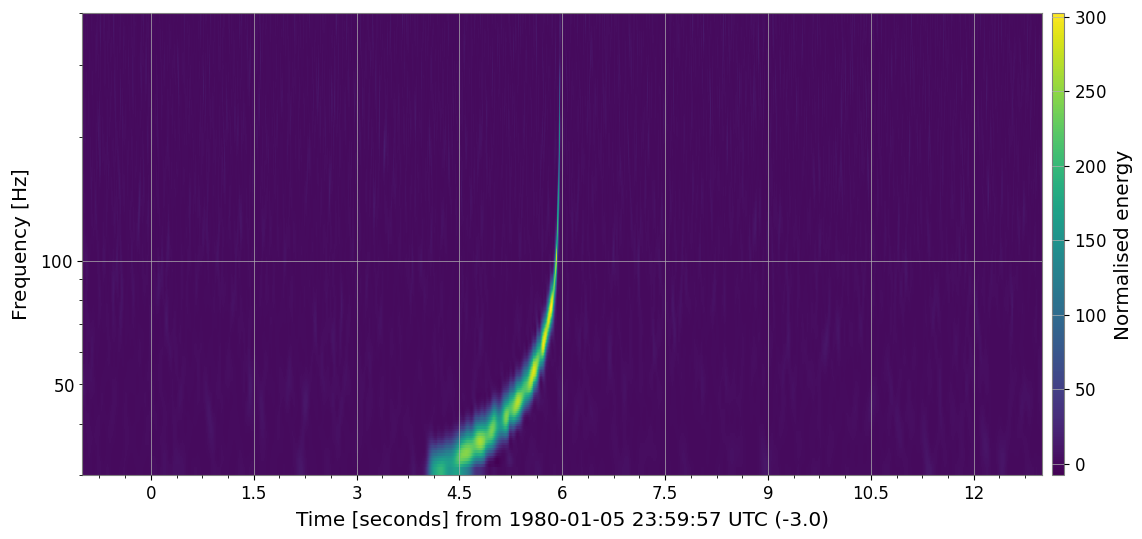

In [ ]:
c1_qtrans = c1_strain.q_transform(frange=(30, 400), qrange=(11, 17.5), outseg=(-4,10))
plot = c1_qtrans.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

The merger isstarts at about 3.8 and ends at about 5.9 in the graph

so starts at 1980-01-06 00:00:00.8 and ends at 1980-01-06 00:00:02.9

### Challenge 2

Load our data into a frame and Timeseries
plot it also for inspection

In [ ]:
c2_f_strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2')
c2_strain = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2")

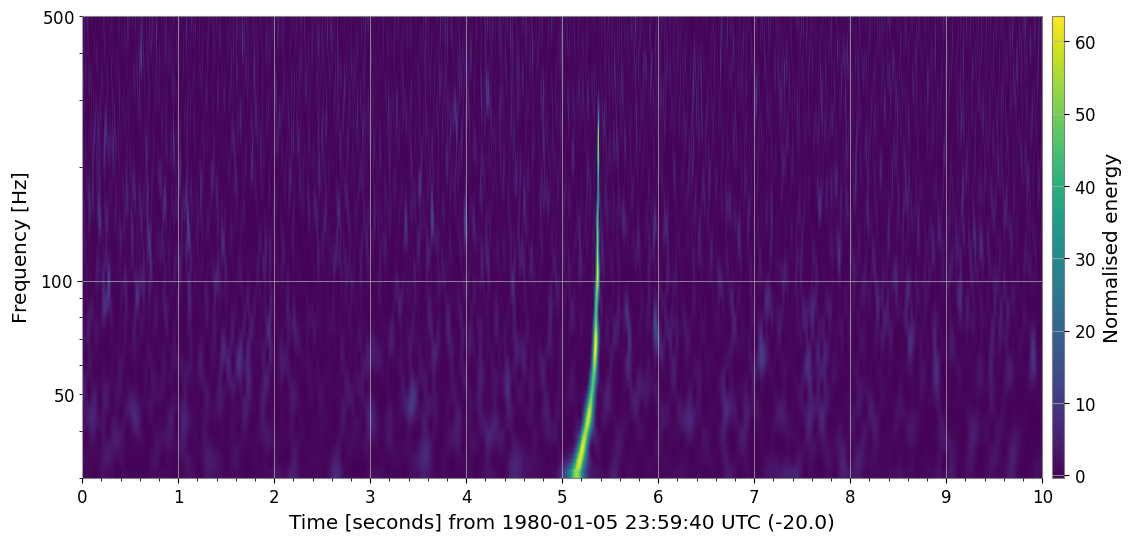

In [ ]:
ch22 = c2_strain.q_transform(frange=(30, 500), qrange=(10, 20), outseg=(-20,-10))
plot = ch22.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")
plot.show()

The merger time is at ~ 1980-01-05 23:59:45

Set our constants and creation and plotting of our waveform but void the second part of the Tuple

Text(0, 0.5, 'Normalized amplitude')

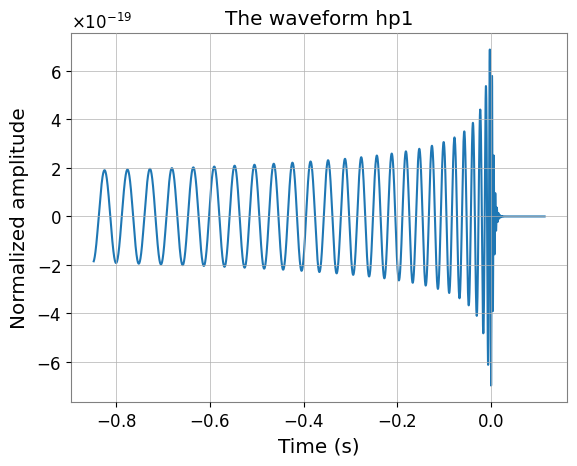

In [ ]:
m1 = m2 =m= 30
spin = 0
dt = c2_strain.dt.value
sample_rate = c2_strain.sample_rate.value

hp1 = get_td_waveform(approximant='SEOBNRv4_opt',
                         mass1=m1,
                         mass2=m2,
                         spin1z = spin,
                         delta_t=1 / sample_rate,
                         f_lower=20)[0]
pylab.figure()
pylab.title("The waveform hp1")
pylab.plot(hp1.sample_times, hp1)
pylab.xlabel('Time (s)')
pylab.ylabel('Normalized amplitude')

In [ ]:
data = c2_strain.value

Make a power spectral density
and plot it to log log scale

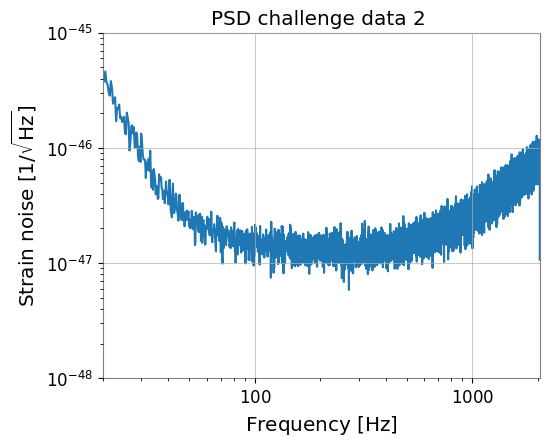

In [ ]:
nyquistfreq = sample_rate/2
psd = c2_strain.psd(fftlength=4, method= "median")

plot = psd.plot()
ax = plot.gca()
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlim(20, nyquistfreq)
ax.set_ylim(1e-48, 1e-45)
ax.set_ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
ax.set_title("PSD challenge data 2 ")
plot.show(warn=False)

In [ ]:
conditioned = c2_f_strain.crop(2, 2)
dir(conditioned)
psd = conditioned.psd(4)
psd = interpolate(psd, conditioned.delta_f)
psd = inverse_spectrum_truncation(psd, int(4 * conditioned.sample_rate),
                                  low_frequency_cutoff=20)

In [ ]:
hp1.resize(len(conditioned))
template = hp1.cyclic_time_shift(hp1.start_time)

Plot the SNR time series and print the Matched filter SNR of the signal


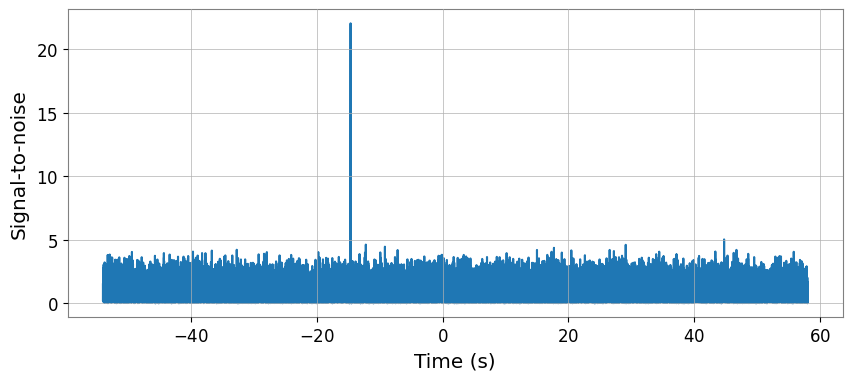

The matched signal is at -14.6328125s with SNR 22.05075553190347


In [ ]:
from pycbc.filter import matched_filter
import numpy

snr = matched_filter(template, conditioned,
                     psd=psd, low_frequency_cutoff=20)

snr = snr.crop(4 + 4, 4)

pylab.figure(figsize=[10, 4])
pylab.plot(snr.sample_times, abs(snr))
pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()

peak = abs(snr).numpy().argmax()
snrp = snr[peak]
time = snr.sample_times[peak]

print("The matched signal is at {}s with SNR {}".format(time,
                                                    abs(snrp)))

#Assigment 3

In [ ]:
!wget -nc https://dcc.ligo.org/public/0146/P1700349/001/H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf
!wget -nc https://dcc.ligo.org/public/0146/P1700349/001/L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf

File ‘H-H1_LOSC_CLN_4_V1-1187007040-2048.gwf’ already there; not retrieving.

File ‘L-L1_LOSC_CLN_4_V1-1187007040-2048.gwf’ already there; not retrieving.



Load our data and display it


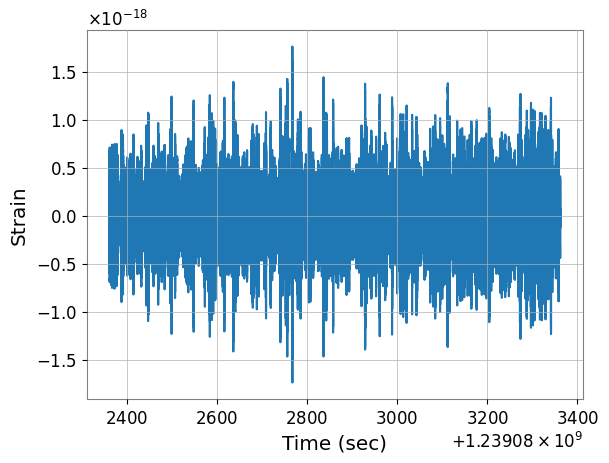

In [ ]:
d = np.load('noise_ts_4096Hz.npy')
time = d[:, 0]
strain = d[:, 1]
dt = time[1] - time[0]
data = TimeSeries(strain, dt=dt)

# Plot the data
plt.plot(time, data)
plt.xlabel('Time (sec)')
plt.ylabel('Strain')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plot 4 seconds of our dat to a PSD

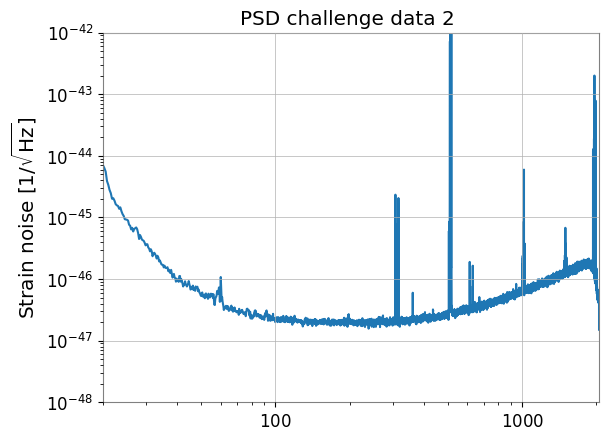

In [ ]:
nyquistfreq = sample_rate/2
psd = data.psd(4)
plt.loglog(psd)

plt.xlim(20, nyquistfreq)
plt.ylim(1e-48, 1e-42)
plt.ylabel(r'Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
plt.title("PSD challenge data 2 ")
plot.show(warn=False)

Test for all Masses an plot on a single plot

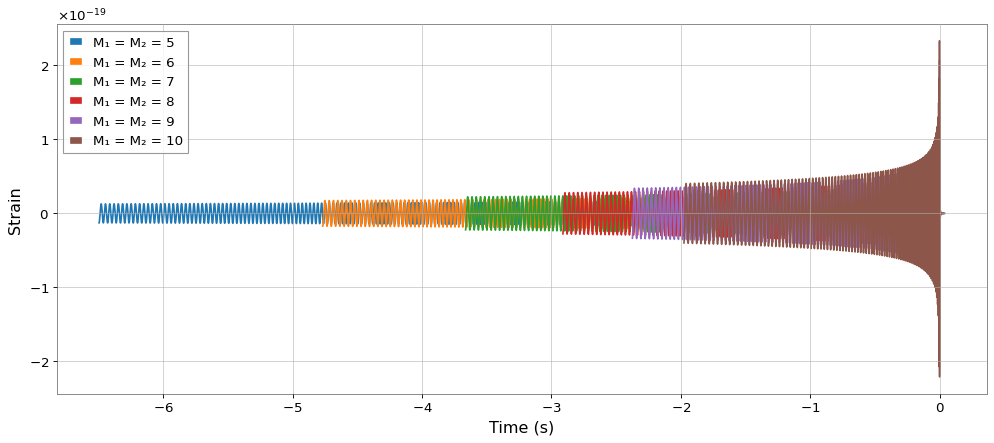

In [ ]:
dt = 1/sample_rate
pylab.figure(figsize=(15, 6), dpi=80)
for m in range(5,11):
  hp = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=dt,
                     f_lower=30)[0]
  pylab.plot(hp.sample_times, hp, label='M\u2081 = M\u2082 = ' + str(m))

pylab.legend()
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.show()

In [ ]:
length = data.duration.value

In [ ]:
data2 = (data.crop(-(length/2-2),(length/2-2)))

/usr/local/lib/python3.10/dist-packages/gwpy/types/series.py:981: UserWarning: TimeSeries.crop given start smaller than current start, crop will begin when the Series actually starts.
  warn(


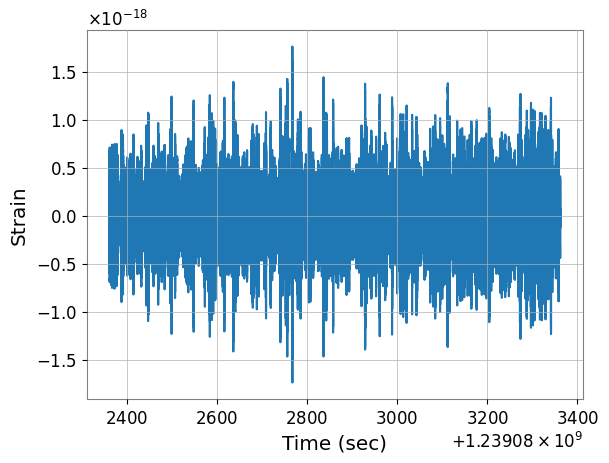

In [ ]:

%matplotlib inline
import pylab
import numpy as np
import pycbc
from pycbc.types import TimeSeries
import matplotlib.pyplot as plt

# Load the data and create a TimeSeries object
d = np.load('noise_ts_4096Hz.npy')
time = d[:, 0]
strain = d[:, 1]
dt = time[1] - time[0]
data = TimeSeries(strain, delta_t=dt)

# Plot the data
plt.plot(time, data)
plt.xlabel('Time (sec)')
plt.ylabel('Strain')
plt.show()

In [ ]:
conditioned2 = data
#conditioned2 = TimeSeries(conditioned2)

psdc = data.psd(4)
psdc = interpolate(psdc, 0.001)
psdc = inverse_spectrum_truncation(psdc, int(4 * conditioned2.sample_rate),
                                  low_frequency_cutoff=15)



We found a signal at 730.10888671875s with SNR 5.00179221722062
We found a signal at 276.44873046875s with SNR 5.233928911273689
We found a signal at 434.10791015625s with SNR 5.272607323100002
We found a signal at 275.683349609375s with SNR 5.778863125684546
We found a signal at 275.629638671875s with SNR 6.0411804810838605
We found a signal at 956.027099609375s with SNR 5.720427066222797


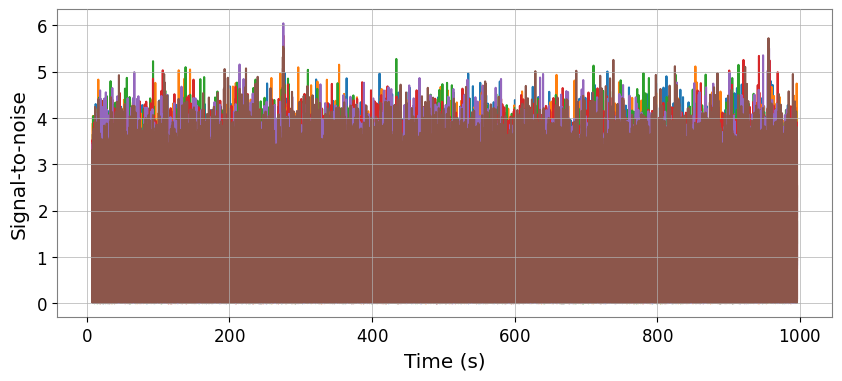

In [ ]:
pylab.figure(figsize=[10, 4])

for m in range(5,11):
  hp = get_td_waveform(approximant="SEOBNRv4_opt",
                     mass1=m,
                     mass2=m,
                     delta_t=1.0/4096,
                     f_lower=30)[0]

# Resize the vector to match our data
  hp.resize(len(conditioned2))
  template = hp.cyclic_time_shift(hp.start_time)
  snr = matched_filter(template, conditioned2,
                     psd=psdc, low_frequency_cutoff=30)
  snr = snr.crop(4 + 4, 4)
  peak = abs(snr).numpy().argmax()
  snrp = snr[peak]
  time = snr.sample_times[peak]

  pylab.plot(snr.sample_times, abs(snr), label='M\u2081 = M\u2082 = ' + str(m))


  print("We found a signal at {}s with SNR {}".format(time,
                                                    abs(snrp)))

pylab.ylabel('Signal-to-noise')
pylab.xlabel('Time (s)')
pylab.show()


Use the code form the tutorial to whiten the data

In [ ]:

psdc[0]=psdc[1]
psdc[len(psdc)-1]=psdc[len(psdc)-2]
data_w = (conditioned2.to_frequencyseries() / psdc**0.5).to_timeseries()
data_w=data_w.crop(4,4)

Basic plot of the histogram with some help from stack overflow

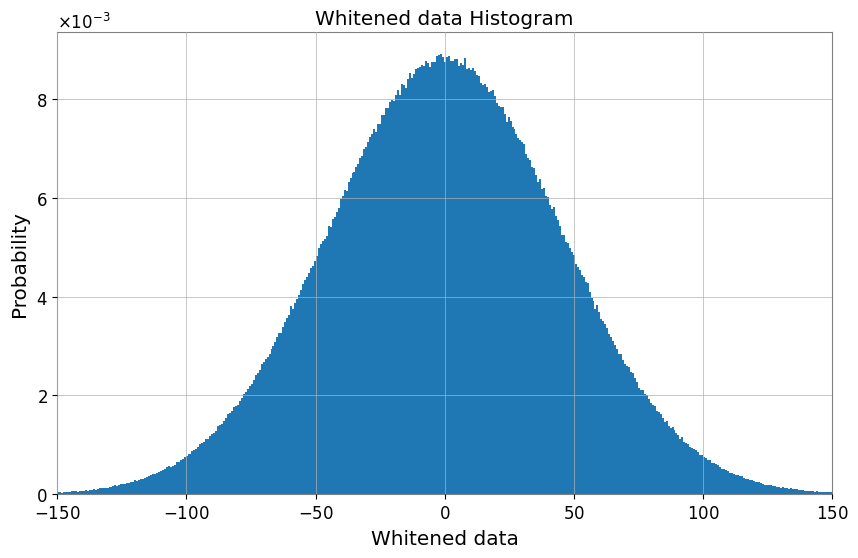

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist(data_w, bins="auto", density=True, label='Whitened Data')
plt.ylabel("Probability")
plt.title("Whitened data Histogram")
plt.xlim(-150,150)

plt.xlabel("Whitened data")

plt.show()


For this part i took inspiration from one of my classmates sources [histograms](https://statisticsbyjim.com/basics/histograms/)

The graphs show that the standard deviation and mean vary over time

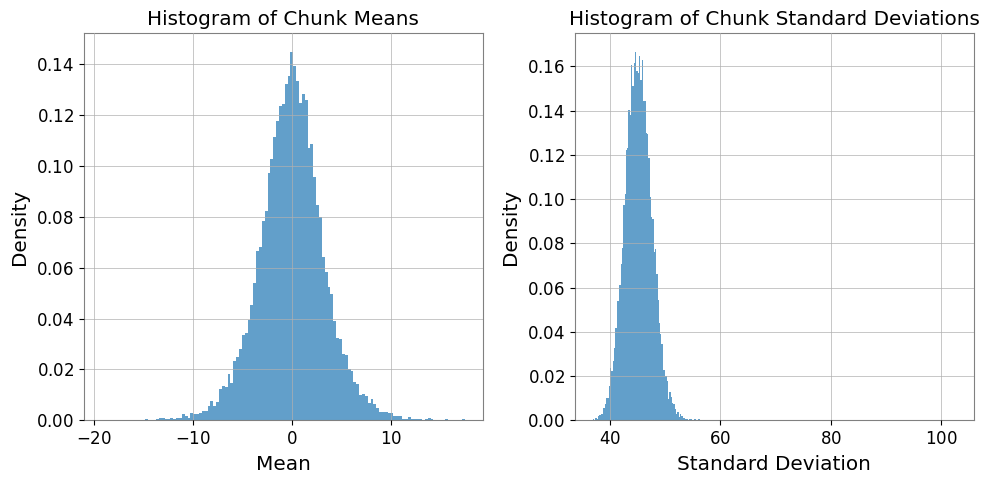

In [ ]:

c_size = 200
num_chunks = len(data_w) // c_size
chunks = np.array_split(data_w, num_chunks)

chunk_means = [np.mean(chunk) for chunk in chunks]
chunk_sigma = [np.std(chunk) for chunk in chunks]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(chunk_means, bins='auto', density=True, alpha=0.7)
plt.xlabel('Mean')
plt.ylabel('Density')
plt.title('Histogram of Chunk Means')

plt.subplot(1, 2, 2)
plt.hist(chunk_sigma, bins='auto', density=True, alpha=0.7)
plt.xlabel('Standard Deviation')
plt.ylabel('Density')
plt.title('Histogram of Chunk Standard Deviations')

plt.tight_layout()
plt.show()